In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
df=pd.read_csv('cosmetics.csv')
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,NaN,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Moisturizer,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35.0,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Moisturizer,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48.0,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Moisturizer,VITA LIBERATA,Self Tan Dry Oil SPF 50,54.0,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Moisturizer,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20.0,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


In [3]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1471 non-null   float64
 4   Rank         1471 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 126.6+ KB


In [4]:
df.isnull().any()

Label          False
Brand          False
Name           False
Price           True
Rank            True
Ingredients    False
Combination    False
Dry            False
Normal         False
Oily           False
Sensitive      False
dtype: bool

In [5]:
#filling null values 
df["Price"].fillna(144, inplace=True)                 
df["Rank"].fillna(5, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [7]:
#data processing
x = df.iloc[:, [0]].values #0,1,3 column of data
y = df.iloc[:, -1].values #last column of data


In [8]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

In [9]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
x_train.shape, x_test.shape


((1030, 1), (442, 1))

In [10]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [11]:
%%time
classifier_rf.fit(x_train, y_train)

Wall time: 386 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [12]:
# checking the oob score
classifier_rf.oob_score_


0.5194174757281553

In [13]:
#Let’s do hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [14]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [18]:
%%time
grid_search.fit(x_train, y_train)


Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 41.2 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [19]:
grid_search.best_score_

0.5194175489397641

In [20]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

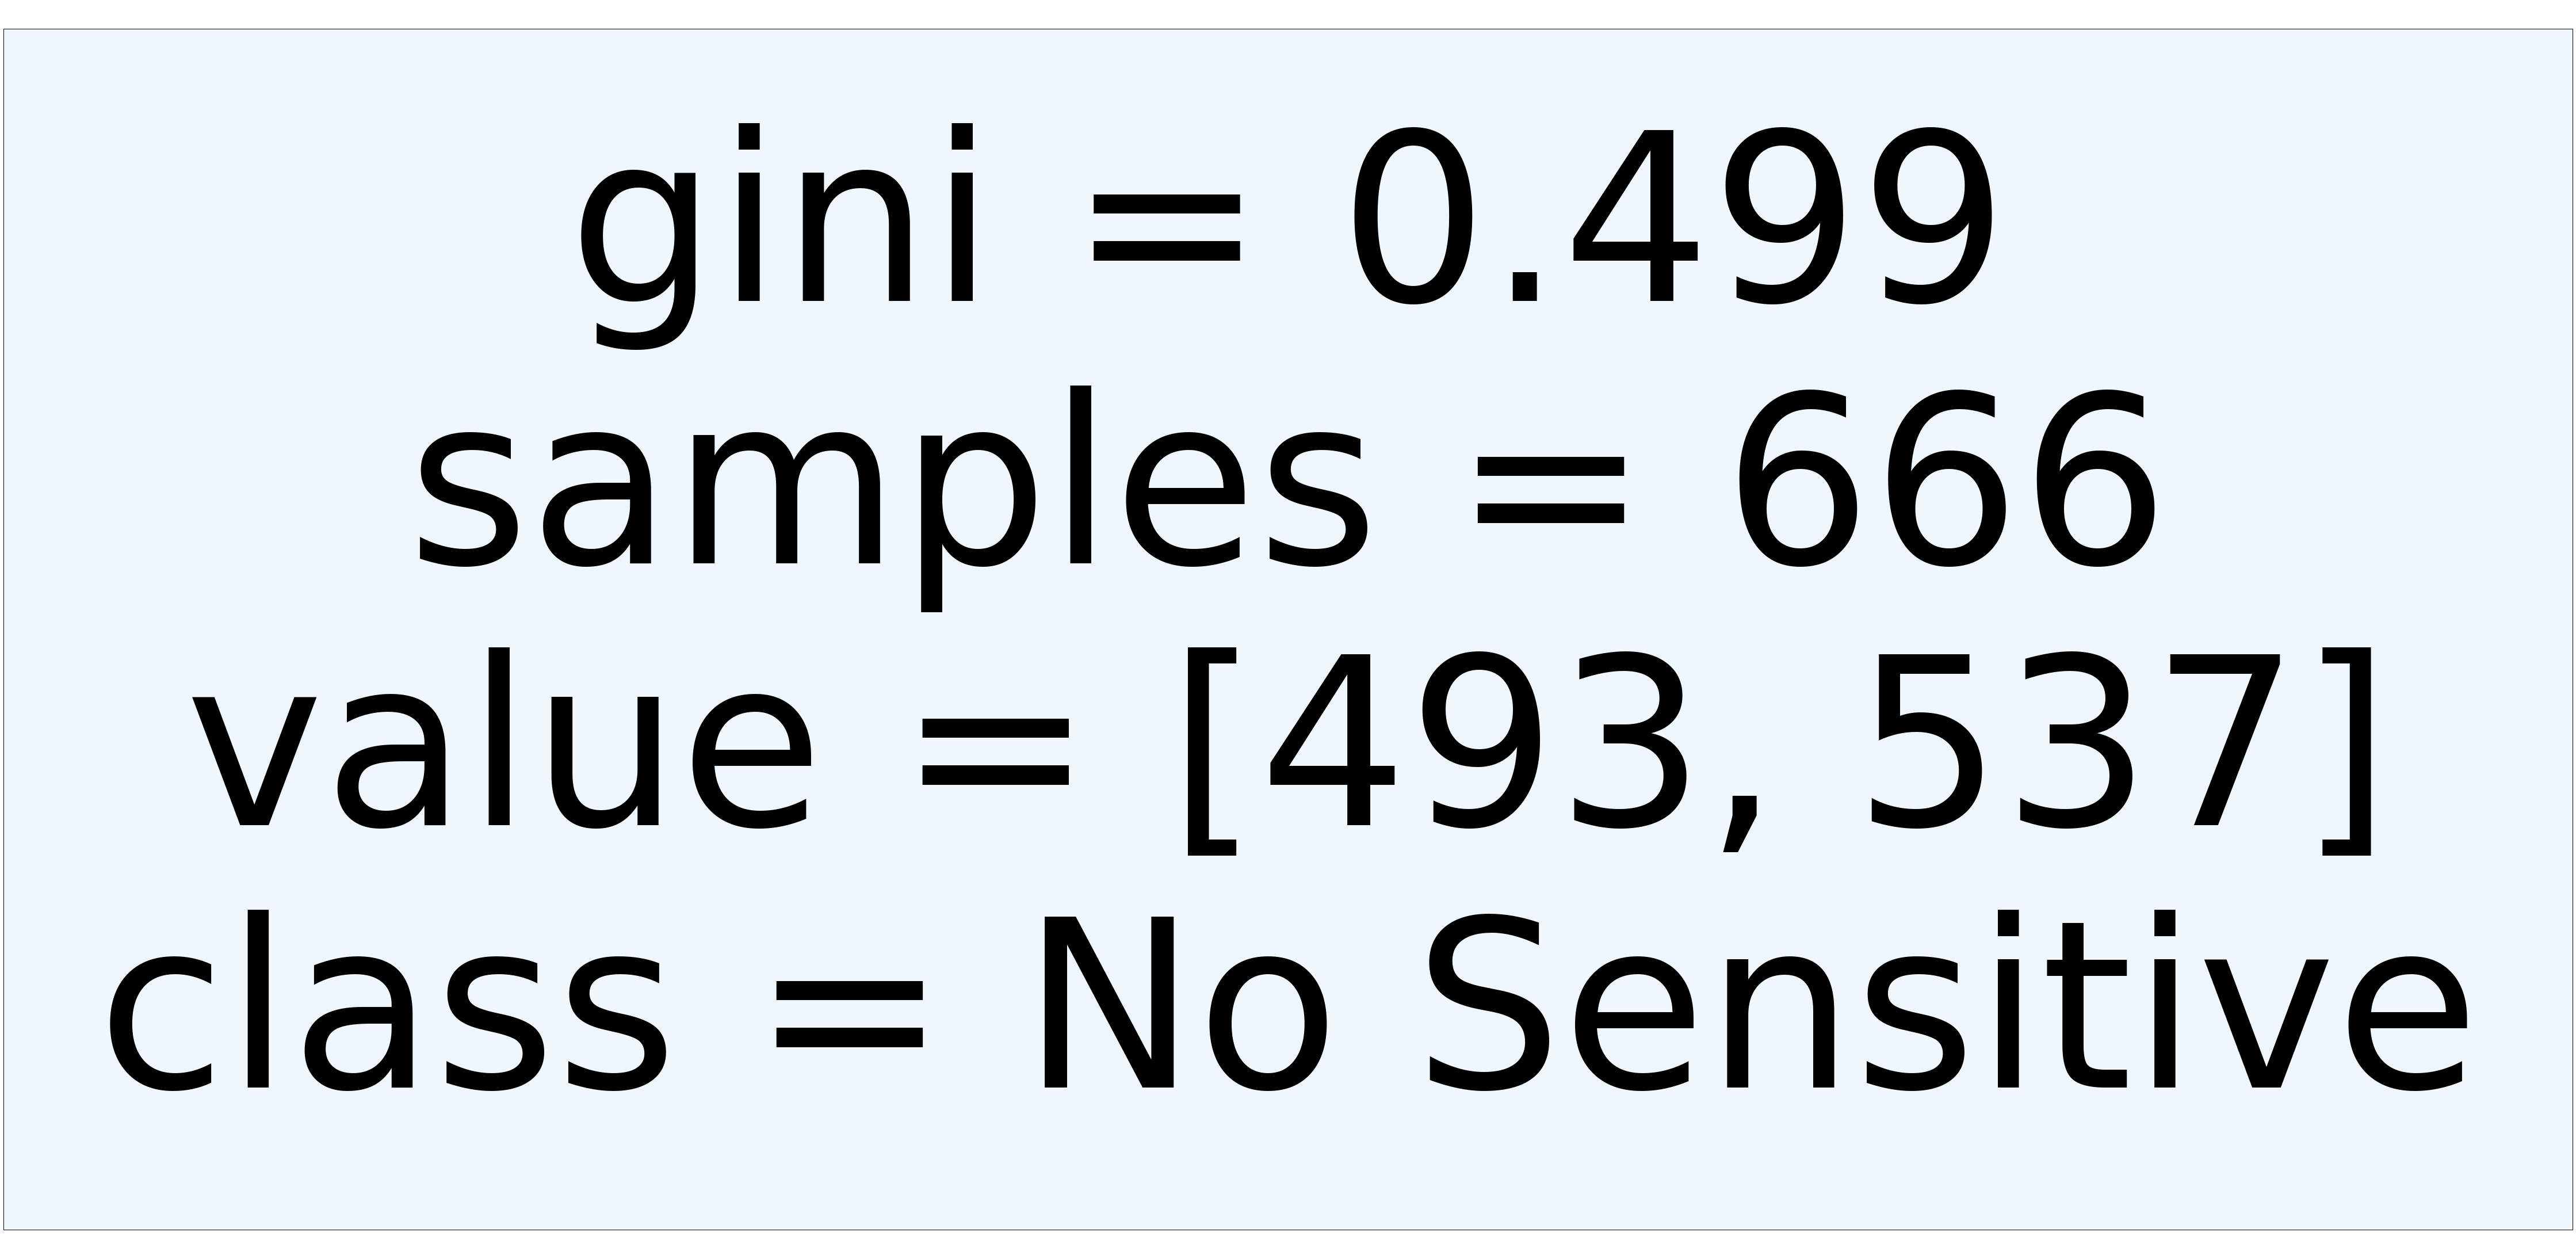

In [30]:
#Now let’s visualize
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = y,class_names=['Sensitive', "No Sensitive"],filled=True);


In [32]:
rf_best.feature_importances_


array([0.])